# Relocating to Toronto 

### Data Analysis

###### ... Boundary Data Analysis

The neighborhood boundary information (source: https://open.toronto.ca/dataset/neighbourhood-profiles/) is contained in the file *Neighbourhoods.csv* and provides the boundaries of each neighborhood in the form of geospatial coordinates of the vertices of the polygon which encloses the neighborhood.

In [97]:
import pandas as pd
import geopandas as gpd
import re

In [98]:
# Load the data from the csv file.
nbhd_bound = pd.read_csv('Neighbourhoods.csv')  

In [99]:
nbhd_bound.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry,CLASSIFICATION,CLASSIFICATION_CODE
0,10641,2480141,26005521,NaN,96,96,Casa Loma (96),Casa Loma (96),NaN,NaN,NaN,NaN,17545105,3.678385e+06,8214.176485,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN
1,10642,2480140,26005520,NaN,95,95,Annex (95),Annex (95),NaN,NaN,NaN,NaN,17545121,5.337192e+06,10513.883143,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN
2,10643,2480139,26005519,NaN,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),NaN,NaN,NaN,NaN,17545137,2.955857e+06,6849.911724,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN
3,10644,2480064,26005444,NaN,64,64,Woodbine Corridor (64),Woodbine Corridor (64),NaN,NaN,NaN,NaN,17545153,3.052518e+06,7512.966773,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN
4,10645,2480063,26005443,NaN,103,103,Lawrence Park South (103),Lawrence Park South (103),NaN,NaN,NaN,NaN,17545169,6.211341e+06,13530.370002,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN


We will now identify the geometry information in order to get the neighborhood boundaries and centroids.  We'll use the geojson file as well which provides cleaner geometry data.

In [100]:
# Identify the geometry information
nbhd_bound[['AREA_NAME','geometry']]

,AREA_NAME,geometry
0,Casa Loma (96),"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,Annex (95),"{u'type': u'Polygon', u'coordinates': (((-79.3..."
2,Caledonia-Fairbank (109),"{u'type': u'Polygon', u'coordinates': (((-79.4..."
3,Woodbine Corridor (64),"{u'type': u'Polygon', u'coordinates': (((-79.3..."
4,Lawrence Park South (103),"{u'type': u'Polygon', u'coordinates': (((-79.4..."
...,...,...
135,Dorset Park (126),"{u'type': u'Polygon', u'coordinates': (((-79.2..."
136,Centennial Scarborough (133),"{u'type': u'Polygon', u'coordinates': (((-79.1..."
137,Humbermede (22),"{u'type': u'Polygon', u'coordinates': (((-79.5..."
138,Willowdale West (37),"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [101]:
# Use the geojson file for easier access to the geometry data in proper form
nbhd_gj = gpd.read_file('Neighbourhoods.geojson')   

In [102]:
nbhd_gj['geometry']

0      POLYGON ((-79.41469 43.67391, -79.41485 43.674...
1      POLYGON ((-79.39414 43.66872, -79.39588 43.668...
2      POLYGON ((-79.46021 43.68156, -79.46044 43.681...
3      POLYGON ((-79.31485 43.66674, -79.31660 43.666...
4      POLYGON ((-79.41096 43.70408, -79.41165 43.703...
                             ...                        
135    POLYGON ((-79.29443 43.77273, -79.29359 43.772...
136    POLYGON ((-79.14511 43.76637, -79.14507 43.767...
137    POLYGON ((-79.52628 43.73640, -79.52649 43.736...
138    POLYGON ((-79.44043 43.76340, -79.44052 43.763...
139    POLYGON ((-79.41225 43.76669, -79.41232 43.766...
Name: geometry, Length: 140, dtype: geometry

In [103]:
from shapely import geometry
from shapely.wkt import loads as load_wkt

In [104]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

In [105]:
nbhd_gj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [106]:
nbhd_gj.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,CLASSIFICATION,CLASSIFICATION_CODE,geometry
0,10641,2480141,26005521,None,96,96,Casa Loma (96),Casa Loma (96),None,None,None,None,17545105,3.678385e+06,8214.176485,None,None,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,10642,2480140,26005520,None,95,95,Annex (95),Annex (95),None,None,None,None,17545121,5.337192e+06,10513.883143,None,None,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,10643,2480139,26005519,None,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),None,None,None,None,17545137,2.955857e+06,6849.911724,None,None,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."
3,10644,2480064,26005444,None,64,64,Woodbine Corridor (64),Woodbine Corridor (64),None,None,None,None,17545153,3.052518e+06,7512.966773,None,None,"POLYGON ((-79.31485 43.66674, -79.31660 43.666..."
4,10645,2480063,26005443,None,103,103,Lawrence Park South (103),Lawrence Park South (103),None,None,None,None,17545169,6.211341e+06,13530.370002,None,None,"POLYGON ((-79.41096 43.70408, -79.41165 43.703..."


In [107]:
#Re-project to CRS for centroid calculations and plotting
nbhd_gj = nbhd_gj.to_crs("EPSG:3395")
nbhd_gj.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

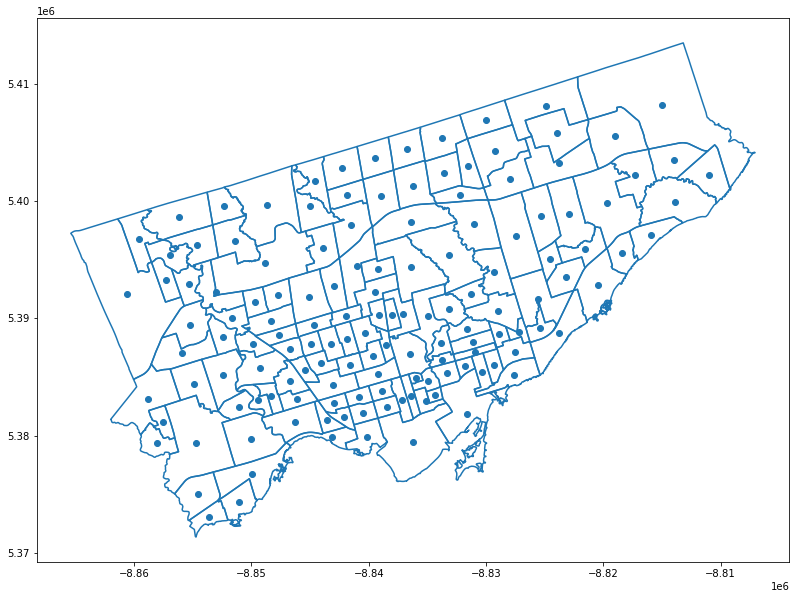

In [108]:
# Plot the neighborhood boundaries and neighborhood centroids

fig, ax = plt.subplots(figsize=(20, 10))
nbhd_gj.boundary.plot(ax=ax)
nbhd_gj.centroid.plot(ax=ax)

Get the centroids of each neighborhood in order to do Foursquare queries.

In [109]:
nbhd_cent = nbhd_gj.centroid
nbhd_cent = nbhd_cent.to_crs("EPSG:4326")

In [110]:
nbhd_cent

0      POINT (-79.40801 43.68185)
1      POINT (-79.40400 43.67159)
2      POINT (-79.45521 43.68857)
3      POINT (-79.31541 43.67677)
4      POINT (-79.40604 43.71721)
                  ...            
135    POINT (-79.27891 43.75928)
136    POINT (-79.15084 43.78238)
137    POINT (-79.54237 43.74343)
138    POINT (-79.42756 43.77121)
139    POINT (-79.40148 43.77060)
Length: 140, dtype: geometry

In [111]:
# Assign the latitudes and Longitudes to columns in the dataframe.
nbhd_bound['centroid_lat'] = nbhd_cent.y
nbhd_bound['centroid_lon'] = nbhd_cent.x


In [112]:
nbhd_bound[['AREA_NAME','centroid_lat','centroid_lon']]

,AREA_NAME,centroid_lat,centroid_lon
0,Casa Loma (96),43.681853,-79.408007
1,Annex (95),43.671586,-79.404000
2,Caledonia-Fairbank (109),43.688569,-79.455212
3,Woodbine Corridor (64),43.676774,-79.315408
4,Lawrence Park South (103),43.717213,-79.406038
...,...,...,...
135,Dorset Park (126),43.759278,-79.278909
136,Centennial Scarborough (133),43.782378,-79.150844
137,Humbermede (22),43.743430,-79.542367
138,Willowdale West (37),43.771211,-79.427557


Use Folium to map the neighborhoods by their centroids and show the 1km radius used for Foursquare queries.

In [113]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

In [114]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


In [115]:
# create map of Toronto using latitude and longitude values
map_tor = folium.Map(location=[latitude, longitude], zoom_start=10, control_scale=True)
# add markers to map
for lat, lng, nbhd in zip(nbhd_bound['centroid_lat'], nbhd_bound['centroid_lon'], nbhd_bound['AREA_NAME']):
    label = '{}'.format(nbhd)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)
    folium.Circle([lat, lng],
                    radius=1000
                      ).add_to(map_tor)
    
map_tor

For each neighborhood (**AREA_NAME**), the coordinates of the vertices of the polygon which encloses it are given (**geometry**).  A centroid of this polygon can be calculated and used as a center point of the neighborhood.  This data will be used in calls to the Foursquare API to get venue information for a given neighborhood.

##### ... Profile Data Analysis

The neighborhood profile information (source: https://open.toronto.ca/dataset/neighbourhood-profiles/) is contained in the file *neighbourhood-profiles-2016-csv.csv* and provides a wealth of demographic, social and economic data about the residents of each neighborhood.

We access neighborhood data below:

In [116]:
nbhd_profile = pd.read_csv('neighbourhood-profiles-2016-csv.csv')
list(nbhd_profile['Category'].unique()[[0,2,9,10]])

['Neighbourhood Information',
 'Families, households and marital status',
 'Education',
 'Housing']

In [117]:
list(nbhd_profile['Category'].unique())

['Neighbourhood Information',
 'Population',
 'Families, households and marital status',
 'Language',
 'Income',
 'Immigration and citizenship',
 'Visible minority',
 'Ethnic origin',
 'Aboriginal peoples',
 'Education',
 'Housing',
 'Language of work',
 'Labour',
 'Journey to work',
 'Mobility']

Now we will focus on specific categories.

In [118]:
# Limit the rows to include only the categories of interest.
nbhd_profile_lim = nbhd_profile[nbhd_profile['Category'].isin(['Neighbourhood Information',
                                                               'Population',
                                                               'Families, households and marital status',
                                                               'Education',
                                                               'Housing'])]
nbhd_profile_lim.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [119]:
# Explore the data in these categories
nbhd_profile_lim[nbhd_profile_lim['Category']=='Neighbourhood Information'][['Topic', 'Data Source','Characteristic']]

,Topic,Data Source,Characteristic
0,Neighbourhood Information,City of Toronto,Neighbourhood Number
1,Neighbourhood Information,City of Toronto,TSNS2020 Designation


Assemble the relevant data in the dataframe "tor_data".

In [120]:
# Explore the data in these categories
pop_data = nbhd_profile_lim[nbhd_profile_lim['Category']=='Population']
pop_data

tor_data = nbhd_profile[0:1]
tor_data = tor_data.append(nbhd_profile[2:3])
tor_data = tor_data.append(nbhd_profile[9:10])
tor_data

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"


In [121]:
nbhd_profile_lim[nbhd_profile_lim['Category']=='Population'][['Topic','Characteristic']]

,Topic,Characteristic
2,Population and dwellings,"Population, 2016"
3,Population and dwellings,"Population, 2011"
4,Population and dwellings,Population Change 2011-2016
5,Population and dwellings,Total private dwellings
6,Population and dwellings,Private dwellings occupied by usual residents
7,Population and dwellings,Population density per square kilometre
8,Population and dwellings,Land area in square kilometres
9,Age characteristics,Children (0-14 years)
10,Age characteristics,Youth (15-24 years)
11,Age characteristics,Working Age (25-54 years)


Family Characteristic Data:

In [122]:
# Explore the data in these categories
nbhd_profile_lim[nbhd_profile_lim['Category']=='Families, households and marital status'][['Topic','Characteristic']]

,Topic,Characteristic
57,Household and dwelling characteristics,Occupied private dwellings by structural type ...
58,Household and dwelling characteristics,Single-detached house
59,Household and dwelling characteristics,Apartment in a building that has five or mor...
60,Household and dwelling characteristics,Other attached dwelling
61,Household and dwelling characteristics,Semi-detached house
...,...,...
122,Family characteristics of adults,Persons age 85+ living alone (total)
123,Family characteristics of adults,Persons age 85+ living alone (per cent)
124,Family characteristics of adults,Population age 20-34 by family characteristics
125,Family characteristics of adults,Single young adults (age 20-34) living at home...


In [123]:
# Further explore the Topics under the 'Families, households and marital status' category
list(nbhd_profile_lim[nbhd_profile_lim['Category']=='Families, households and marital status']['Topic'].unique())

['Household and dwelling characteristics',
 'Marital status',
 'Family characteristics',
 'Household type',
 'Family characteristics of adults']

In [124]:
Fam_char = nbhd_profile_lim[nbhd_profile_lim['Category']=='Families, households and marital status']
list(Fam_char[Fam_char['Topic']=='Family characteristics']['Characteristic'])

['Census families in private households by family size',
 '  2 persons',
 '  3 persons',
 '  4 persons',
 '  5 or more persons',
 '  Couples without children',
 'Total number of census families in private households',
 '  Total couple families',
 '    Married couples',
 '    Common-law couples',
 '  Total lone-parent families by sex of parent',
 '    Female parent',
 '    Male parent',
 'Couple census families in private households',
 '  Couples with children',
 '    1 child',
 '    2 children',
 '    3 or more children',
 'Lone-parent census families in private households',
 '  1 child',
 '  2 children',
 '  3 or more children',
 'Persons not in census families in private households']

In [125]:
Fam_char[Fam_char['Topic']=='Family characteristics']

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
84,85,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Census families in private households by famil...,"718,755",8430,6650,3480,6710,...,4460,6315,14395,3435,2195,3485,3065,3160,7005,3940
85,86,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,2 persons,"344,110",3570,2970,1605,4475,...,2350,2850,5930,1645,1125,1820,1555,2130,3150,1835
86,87,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,3 persons,"174,600",2390,1835,900,1195,...,1090,1515,3675,840,565,765,680,535,1845,1035
87,88,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,4 persons,"143,250",1875,1325,755,805,...,820,1420,3200,780,410,680,665,380,1395,740
88,89,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,5 or more persons,"56,795",605,520,220,215,...,210,510,1620,160,95,195,170,115,610,330
89,90,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Couples without children,"250,085",2520,2095,1175,3830,...,1905,2060,3895,1190,830,1320,1290,1850,1955,1245
90,91,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Total number of census families in private hou...,"718,755",8425,6640,3490,6700,...,4455,6315,14400,3430,2200,3475,3065,3160,7000,3930
91,92,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Total couple families,"566,155",6770,5275,2815,5805,...,3820,4950,10950,2755,1770,2730,2640,2775,4920,2935
92,93,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Married couples,"481,125",6430,4880,2450,4110,...,3435,4540,10100,2160,1395,2120,2105,2095,4290,2575
93,94,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Common-law couples,"85,030",335,400,370,1690,...,380,415,860,595,375,615,535,675,635,355


In [126]:
#Extract some of the more important rows

tor_data = tor_data.append(nbhd_profile[84:85])
tor_data = tor_data.append(nbhd_profile[91:92])
tor_data = tor_data.append(nbhd_profile[98:99])
tor_data = tor_data.append(nbhd_profile[89:90])
tor_data = tor_data.append(nbhd_profile[94:95])
tor_data = tor_data.append(nbhd_profile[107:108])
tor_data.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
84,85,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Census families in private households by famil...,"718,755",8430,6650,3480,6710,...,4460,6315,14395,3435,2195,3485,3065,3160,7005,3940
91,92,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Total couple families,"566,155",6770,5275,2815,5805,...,3820,4950,10950,2755,1770,2730,2640,2775,4920,2935


Household Type data:

In [127]:
House_type = nbhd_profile_lim[nbhd_profile_lim['Category']=='Families, households and marital status']
#House_type.reset_index(drop = True,inplace = True)
list(House_type[House_type['Topic']=='Household type']['Characteristic'])

['  Non-census-family households',
 'Private households by household type',
 '  One-census-family households',
 '    Without children in a census family',
 '    With children in a census family',
 '  Multiple-census-family households',
 '    One-person households',
 '    Two-or-more person non-census-family households']

In [128]:
House_type[House_type['Topic']=='Household type']

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
105,106,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,Non-census-family households,"427,975",1645,2060,1290,9325,...,3240,2440,5160,2090,1310,2510,2645,3865,3640,1625
108,109,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,Private households by household type,"1,112,930",9130,8135,4615,15935,...,7550,8510,18430,5450,3450,5885,5680,7010,10170,5345
109,110,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,One-census-family households,"653,360",6600,5550,3180,6525,...,4165,5820,12255,3295,2085,3285,3000,3130,6090,3510
110,111,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,Without children in a census family,"226,080",1795,1660,1050,3745,...,1760,1880,3125,1145,785,1245,1250,1830,1675,1065
111,112,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,With children in a census family,"427,275",4795,3890,2130,2785,...,2410,3935,9140,2160,1295,2040,1750,1295,4430,2440
112,113,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,Multiple-census-family households,"31,600",885,525,150,80,...,145,235,1020,65,60,95,30,15,445,205
113,114,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,One-person households,"359,960",1350,1615,1105,7885,...,2650,2175,4220,1860,1110,2075,2365,3465,2665,1355
114,115,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,Two-or-more person non-census-family house...,"68,010",290,445,185,1430,...,580,275,950,230,205,435,280,395,975,275


In [129]:
tor_data = tor_data.append(nbhd_profile[109:112])

In [130]:
tor_data.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
84,85,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Census families in private households by famil...,"718,755",8430,6650,3480,6710,...,4460,6315,14395,3435,2195,3485,3065,3160,7005,3940
91,92,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Total couple families,"566,155",6770,5275,2815,5805,...,3820,4950,10950,2755,1770,2730,2640,2775,4920,2935


Education data:

In [131]:
# Explore the data in these categories
#nbhd_profile_lim[nbhd_profile_lim['Category']=='Education'][['Topic','Characteristic']]
nbhd_profile_lim[nbhd_profile_lim['Category']=='Education']['Topic'].unique()



array(['Highest certificate, diploma or degree',
       'Major field of study - Classification of Instructional Programs (CIP) 2016',
       'Location of study compared with province or territory of residence with countries outside Canada'],
      dtype=object)

In [132]:
Edu_level = nbhd_profile_lim[nbhd_profile_lim['Category']=='Education']


In [133]:
Edu_level[Edu_level['Topic']=='Highest certificate, diploma or degree']['Characteristic']

1211                                      Master's degree
1675         Postsecondary certificate, diploma or degree
1683        Apprenticeship or trades certificate or di...
1702    Total - Highest certificate, diploma or degree...
1703                    No certificate, diploma or degree
1704      Secondary (high) school diploma or equivalen...
1705          Trades certificate or diploma other than...
1706          Certificate of Apprenticeship or Certifi...
1707        College, CEGEP or other non-university cer...
1708        University certificate or diploma below ba...
1709        University certificate, diploma or degree ...
1710                                    Bachelor's degree
1711          University certificate or diploma above ...
1712          Degree in medicine, dentistry, veterinar...
1713                                     Earned doctorate
1714    Total - Highest certificate, diploma or degree...
1715                    No certificate, diploma or degree
1716      Seco

In [134]:
Edu_level[Edu_level['Topic']=='Highest certificate, diploma or degree']

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
1211,1212,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,Master's degree,192120,890,1020,430,4795,...,1770,1005,2135,965,540,1310,1780,2100,1030,430
1675,1676,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,"Postsecondary certificate, diploma or degree",1356360,10985,10285,5300,20430,...,10315,9935,21370,6620,3920,7230,7990,8820,11420,5240
1683,1684,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,Apprenticeship or trades certificate or di...,94005,885,705,690,530,...,405,1125,1840,405,320,420,230,275,1330,765
1702,1703,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,"Total - Highest certificate, diploma or degree...",2294785,25000,20400,10265,26290,...,14860,18585,43410,10110,6690,11385,10000,11100,23520,12065
1703,1704,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,"No certificate, diploma or degree",377340,6550,4035,2005,1585,...,1405,3440,8850,1430,1015,1860,575,460,5125,3445
1704,1705,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,Secondary (high) school diploma or equivalen...,561090,7460,6090,2960,4270,...,3140,5205,13170,2065,1760,2285,1430,1820,6980,3385
1705,1706,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,Trades certificate or diploma other than...,53060,505,375,345,265,...,205,615,1025,225,190,220,140,165,830,425
1706,1707,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,Certificate of Apprenticeship or Certifi...,40945,375,325,345,265,...,210,510,830,185,125,205,85,100,505,340
1707,1708,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,"College, CEGEP or other non-university cer...",362080,3540,3150,2095,2700,...,1935,3075,7535,1760,1235,1710,1275,1410,3765,1755
1708,1709,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,University certificate or diploma below ba...,65015,775,655,230,615,...,455,465,1120,225,125,330,235,360,765,320


In [135]:
tor_data = tor_data.append(nbhd_profile[1702:1703])
tor_data = tor_data.append(nbhd_profile[1709:1710])

In [138]:
tor_data['City of Toronto'].replace('nan','0',inplace=True)

In [139]:
for col in range(5,tor_data.shape[1]):
    tor_data.iloc[:,col]=tor_data.iloc[:,col].astype(str)           
    tor_data.iloc[:,col]=tor_data.iloc[:,col].str.replace(",","").astype(int)

tor_data.dtypes

_id                         int64
Category                   object
Topic                      object
Data Source                object
Characteristic             object
                            ...  
Wychwood                    int32
Yonge-Eglinton              int32
Yonge-St.Clair              int32
York University Heights     int32
Yorkdale-Glen Park          int32
Length: 146, dtype: object

In [140]:
new_row=tor_data.iloc[11][5:146]/tor_data.iloc[9][5:146]
new_row['Characteristic']='FamWchild_Ratio'
tor_data=tor_data.append(new_row,ignore_index=True)

In [141]:
new_row=tor_data.iloc[13][5:146]/tor_data.iloc[12][5:146]
new_row['Characteristic']='Ed_Ratio'
tor_data=tor_data.append(new_row,ignore_index=True)

Look at the assembled data in the dataframe.

In [142]:
tor_data

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1.0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,0.000000e+00,129.000000,128.000000,20.000000,95.000000,...,37.000000,7.000000,137.000000,64.000000,60.000000,94.000000,100.000000,97.000000,27.000000,31.000000
1,3.0,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016",2.731571e+06,29113.000000,23757.000000,12054.000000,30526.000000,...,16936.000000,22156.000000,53485.000000,12541.000000,7865.000000,14349.000000,11817.000000,12528.000000,27593.000000,14804.000000
2,10.0,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),3.981350e+05,3840.000000,3075.000000,1760.000000,2360.000000,...,1785.000000,3555.000000,9625.000000,2325.000000,1165.000000,1860.000000,1800.000000,1210.000000,4045.000000,1960.000000
3,85.0,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Census families in private households by famil...,7.187550e+05,8430.000000,6650.000000,3480.000000,6710.000000,...,4460.000000,6315.000000,14395.000000,3435.000000,2195.000000,3485.000000,3065.000000,3160.000000,7005.000000,3940.000000
4,92.0,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Total couple families,5.661550e+05,6770.000000,5275.000000,2815.000000,5805.000000,...,3820.000000,4950.000000,10950.000000,2755.000000,1770.000000,2730.000000,2640.000000,2775.000000,4920.000000,2935.000000
5,99.0,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Couples with children,3.160700e+05,4250.000000,3180.000000,1645.000000,1975.000000,...,1910.000000,2905.000000,7055.000000,1565.000000,935.000000,1405.000000,1350.000000,925.000000,2960.000000,1700.000000
6,90.0,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Couples without children,2.500850e+05,2520.000000,2095.000000,1175.000000,3830.000000,...,1905.000000,2060.000000,3895.000000,1190.000000,830.000000,1320.000000,1290.000000,1850.000000,1955.000000,1245.000000
7,95.0,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Total lone-parent families by sex of parent,1.526000e+05,1655.000000,1365.000000,665.000000,895.000000,...,640.000000,1370.000000,3455.000000,675.000000,430.000000,750.000000,425.000000,390.000000,2075.000000,1005.000000
8,108.0,"Families, households and marital status",Family characteristics,Census Profile 98-316-X2016001,Persons not in census families in private hous...,6.028600e+05,3885.000000,4005.000000,1930.000000,11730.000000,...,4430.000000,3390.000000,8705.000000,2630.000000,1765.000000,3460.000000,3120.000000,4430.000000,6880.000000,2535.000000
9,110.0,"Families, households and marital status",Household type,Census Profile 98-316-X2016001,One-census-family households,6.533600e+05,6600.000000,5550.000000,3180.000000,6525.000000,...,4165.000000,5820.000000,12255.000000,3295.000000,2085.000000,3285.000000,3000.000000,3130.000000,6090.000000,3510.000000


Create a new dataframe with only the Summary Data.

In [143]:
Summary_Data=tor_data.iloc[0:1]
Summary_Data=Summary_Data.append(tor_data.iloc[14:16])
Summary_Data=Summary_Data.drop(['_id','Topic','Category','Data Source'],axis=1)
Summary_Data

,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Number,0.000000,129.000000,128.000000,20.000000,95.000000,42.000000,34.000000,76.000000,52.000000,...,37.000000,7.000000,137.000000,64.000000,60.000000,94.000000,100.000000,97.000000,27.000000,31.000000
14,FamWchild_Ratio,0.653966,0.726515,0.700901,0.669811,0.426820,0.607789,0.683480,0.420738,0.576286,...,0.578631,0.676117,0.745818,0.655539,0.621103,0.621005,0.583333,0.413738,0.727422,0.695157
15,Ed_Ratio,0.363982,0.232200,0.282598,0.223088,0.631038,0.463873,0.375424,0.630326,0.522830,...,0.505720,0.283293,0.250173,0.417409,0.335575,0.419412,0.625500,0.610360,0.236182,0.199337


In [144]:
SD=Summary_Data.transpose()
SD=SD.rename(columns={0:'Nbhd Num',14:'FamWchild_Ratio',15:'Ed_Ratio'})

In [145]:
SD=SD.drop(['Characteristic','City of Toronto'])

In [146]:
SD=SD.astype(float)

View the new summary data dataframe (SD).

In [147]:
SD

,Nbhd Num,FamWchild_Ratio,Ed_Ratio
Agincourt North,129.0,0.726515,0.232200
Agincourt South-Malvern West,128.0,0.700901,0.282598
Alderwood,20.0,0.669811,0.223088
Annex,95.0,0.426820,0.631038
Banbury-Don Mills,42.0,0.607789,0.463873
...,...,...,...
Wychwood,94.0,0.621005,0.419412
Yonge-Eglinton,100.0,0.583333,0.625500
Yonge-St.Clair,97.0,0.413738,0.610360
York University Heights,27.0,0.727422,0.236182


View some statistics on the summary data.

In [148]:
SD.describe()

,Nbhd Num,FamWchild_Ratio,Ed_Ratio
count,140.0000,140.000000,140.000000
mean,70.5000,0.655296,0.360405
std,40.5586,0.105397,0.150243
min,1.0000,0.298456,0.086387
25%,35.7500,0.611644,0.239931
50%,70.5000,0.673253,0.349853
75%,105.2500,0.724936,0.486900
max,140.0000,0.828791,0.673254


In [149]:
SD['Nbhd Num']=SD['Nbhd Num'].astype(int)
SD

,Nbhd Num,FamWchild_Ratio,Ed_Ratio
Agincourt North,129,0.726515,0.232200
Agincourt South-Malvern West,128,0.700901,0.282598
Alderwood,20,0.669811,0.223088
Annex,95,0.426820,0.631038
Banbury-Don Mills,42,0.607789,0.463873
...,...,...,...
Wychwood,94,0.621005,0.419412
Yonge-Eglinton,100,0.583333,0.625500
Yonge-St.Clair,97,0.413738,0.610360
York University Heights,27,0.727422,0.236182


In [150]:
nbhd_qualify=SD[(SD['FamWchild_Ratio']>0.65) & (SD['Ed_Ratio']>0.36)]
nbhd_qualify.shape

(25, 3)

In [151]:
nbhd_qualify['Nbhd Num']

Bathurst Manor                   34
Bedford Park-Nortown             39
Blake-Jones                      69
Centennial Scarborough          133
Clanton Park                     33
Danforth                         66
Danforth East York               59
Don Valley Village               47
East End-Danforth                62
Forest Hill North               102
Greenwood-Coxwell                65
Henry Farm                       53
Hillcrest Village                48
Lambton Baby Point              114
Lawrence Park North             105
Lawrence Park South             103
Leaside-Bennington               56
Newtonbrook East                 50
Newtonbrook West                 36
Princess-Rosethorn               10
Runnymede-Bloor West Village     89
St.Andrew-Windfields             40
Taylor-Massey                    61
Westminster-Branson              35
Woodbine Corridor                64
Name: Nbhd Num, dtype: int32

In [152]:
nbhd_bound=nbhd_bound.rename(columns={'AREA_SHORT_CODE':'Nbhd Num'})

Merge the qualifying neighborhood data with te boundary data.

In [153]:
nbhd_bound=nbhd_bound.merge(nbhd_qualify,on='Nbhd Num')

Now we have the boundary data only for the qualifying neighborhoods.

In [154]:
nbhd_bound

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,Nbhd Num,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,...,OBJECTID,Shape__Area,Shape__Length,geometry,CLASSIFICATION,CLASSIFICATION_CODE,centroid_lat,centroid_lon,FamWchild_Ratio,Ed_Ratio
0,10644,2480064,26005444,NaN,64,64,Woodbine Corridor (64),Woodbine Corridor (64),NaN,NaN,...,17545153,3.052518e+06,7512.966773,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN,43.676774,-79.315408,0.655539,0.417409
1,10645,2480063,26005443,NaN,103,103,Lawrence Park South (103),Lawrence Park South (103),NaN,NaN,...,17545169,6.211341e+06,13530.370002,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN,43.717213,-79.406038,0.672749,0.642217
2,10647,2480138,26005518,NaN,53,53,Henry Farm (53),Henry Farm (53),NaN,NaN,...,17545201,4.976458e+06,11278.106958,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN,43.771144,-79.341240,0.659326,0.482210
3,10662,2480052,26005432,NaN,47,47,Don Valley Village (47),Don Valley Village (47),NaN,NaN,...,17545441,8.087001e+06,11538.446533,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN,43.783295,-79.353644,0.706178,0.424901
4,10664,2480132,26005512,NaN,35,35,Westminster-Branson (35),Westminster-Branson (35),NaN,NaN,...,17545473,7.040804e+06,15929.515073,"{u'type': u'Polygon', u'coordinates': (((-79.4...",Emerging Neighbourhood,EN,43.778815,-79.452419,0.672961,0.373460
5,10668,2480128,26005508,NaN,40,40,St.Andrew-Windfields (40),St.Andrew-Windfields (40),NaN,NaN,...,17545537,1.400179e+07,18026.094798,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN,43.756246,-79.379035,0.685714,0.516622
6,10674,2480122,26005502,NaN,65,65,Greenwood-Coxwell (65),Greenwood-Coxwell (65),NaN,NaN,...,17545633,3.204179e+06,9467.824002,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN,43.672614,-79.324318,0.651811,0.384906
7,10677,2480048,26005428,NaN,34,34,Bathurst Manor (34),Bathurst Manor (34),NaN,NaN,...,17545681,9.133974e+06,20183.925841,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN,43.764816,-79.456057,0.683480,0.375424
8,10688,2480115,26005495,NaN,59,59,Danforth East York (59),Danforth East York (59),NaN,NaN,...,17545857,4.188624e+06,10540.912802,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN,43.689468,-79.331403,0.656422,0.373888
9,10695,2480180,26005560,NaN,61,61,Taylor-Massey (61),Taylor-Massey (61),NaN,NaN,...,17545969,2.034614e+06,8222.591693,"{u'type': u'Polygon', u'coordinates': (((-79.2...",Neighbourhood Improvement Area,NIA,43.694999,-79.295901,0.724409,0.361931


In [157]:
#list(nbhd_bound['AREA_NAME'])
nbhd_bound[['Nbhd Num','AREA_NAME']]

,Nbhd Num,AREA_NAME
0,64,Woodbine Corridor (64)
1,103,Lawrence Park South (103)
2,53,Henry Farm (53)
3,47,Don Valley Village (47)
4,35,Westminster-Branson (35)
5,40,St.Andrew-Windfields (40)
6,65,Greenwood-Coxwell (65)
7,34,Bathurst Manor (34)
8,59,Danforth East York (59)
9,61,Taylor-Massey (61)


This data will allow use to find (using Foursquare) neighborhoods with venues as requested by the family.

##### Foursquare

Foursquare is a location-based search tool for exploring numerous types of "venues" in a prescibed geographical region.  These venues include businesses, recreational areas and schools, just to name a few.  We will be using data obtained from Foursquare via the Foursquare API. 

In [59]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [60]:
nb_longitude = nbhd_bound.loc[0, 'centroid_lon'] # centroid latitude value
nb_latitude = nbhd_bound.loc[0, 'centroid_lat'] # centroid longitude value

nb_name =  nbhd_bound.loc[0, 'AREA_NAME'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(nb_name, 
                                                               nb_latitude, 
                                                               nb_longitude))

Latitude and longitude values of Woodbine Corridor (64) are 43.67677380463225, -79.31540758179126.


In [177]:
# Set up the Foursquare calls:

CLIENT_ID = 'xxxxxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxxxxxxxxxxxxx
CLIENT_SECRET:xxxxxxxxxxxxxxxxx


SKIP: Test the Foursquare API with a call for universities near Casa Loma.

In [62]:
#radius = 5000 # define radius
#query = 'University'
# create URL
#url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
#    CLIENT_ID, 
#    CLIENT_SECRET, 
#    VERSION, 
#    nb_latitude, 
#    nb_longitude, 
#    radius,
#    LIMIT,
#    query)
#url # display URL

In [63]:
#results = requests.get(url).json()
#results

In [64]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [65]:
#venues = results['response']['groups'][0]['items']
#venues

In [66]:
#nearby_venues = json_normalize(venues) # flatten JSON
#print(nearby_venues.columns)

# filter columns
#filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
#filtered_columns = ['venue.categories','venue.name','venue.location.lat', 'venue.location.lng']
#nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
#nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
#nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

#nearby_venues

In [67]:
#print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

In [68]:
uradius = 7500  # radius to be used for "University" search

Define a new function to call only for nearby universities.

In [69]:
def getNearbyUniversities(names, latitudes, longitudes, radius=uradius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        print(uradius)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=University'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            uradius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['AREA_NAME', 
                  'Nbhd Centroid Latitude', 
                  'Nbhd Centroid Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now, find the neighborhoods with universities nearby.

In [70]:
nbhd_univ = getNearbyUniversities(names=nbhd_bound['AREA_NAME'],
                                   latitudes=nbhd_bound['centroid_lat'],
                                   longitudes=nbhd_bound['centroid_lon'])

Woodbine Corridor (64)
7500
Lawrence Park South (103)
7500
Henry Farm (53)
7500
Don Valley Village (47)
7500
Westminster-Branson (35)
7500
St.Andrew-Windfields (40)
7500
Greenwood-Coxwell (65)
7500
Bathurst Manor (34)
7500
Danforth East York (59)
7500
Taylor-Massey (61)
7500
Blake-Jones (69)
7500
Forest Hill North (102)
7500
Hillcrest Village (48)
7500
Danforth (66)
7500
Newtonbrook West (36)
7500
Bedford Park-Nortown (39)
7500
Lawrence Park North (105)
7500
Clanton Park (33)
7500
Lambton Baby Point (114)
7500
Runnymede-Bloor West Village (89)
7500
East End-Danforth (62)
7500
Newtonbrook East (50)
7500
Princess-Rosethorn (10)
7500
Leaside-Bennington (56)
7500
Centennial Scarborough (133)
7500


Limit the universities to just University of Toronto, Ryerson University and York University.

In [71]:
nbhd_univ=nbhd_univ[nbhd_univ['Venue Category'] == 'University']
nbhd_univ=nbhd_univ[nbhd_univ['Venue'].isin(['University of Toronto','Ryerson University','York University'])]
nbhd_univ.head()

,AREA_NAME,Nbhd Centroid Latitude,Nbhd Centroid Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Woodbine Corridor (64),43.676774,-79.315408,University of Toronto,43.662493,-79.39522,University
2,Woodbine Corridor (64),43.676774,-79.315408,Ryerson University,43.657935,-79.38049,University
59,Lawrence Park South (103),43.717213,-79.406038,University of Toronto,43.662493,-79.39522,University
79,Lawrence Park South (103),43.717213,-79.406038,Ryerson University,43.657935,-79.38049,University
149,Greenwood-Coxwell (65),43.672614,-79.324318,University of Toronto,43.662493,-79.39522,University


In [162]:
Limited_nbhds=nbhd_univ['AREA_NAME'].unique()
ulimit=nbhd_bound[nbhd_bound['AREA_NAME'].isin(Limited_nbhds)]
ulimit[['Nbhd Num','AREA_NAME']]

,Nbhd Num,AREA_NAME
0,64,Woodbine Corridor (64)
1,103,Lawrence Park South (103)
6,65,Greenwood-Coxwell (65)
8,59,Danforth East York (59)
10,69,Blake-Jones (69)
11,102,Forest Hill North (102)
13,66,Danforth (66)
19,89,Runnymede-Bloor West Village (89)
20,62,East End-Danforth (62)
23,56,Leaside-Bennington (56)


Now we will search for other types of venues nearby (within 1km of a neighborhood centroid).

Note: we will only explore the neighboords which qualify for the university requirement.

In [73]:
search_radius = 1000 # define radius

In [74]:
nbhd_bound=nbhd_bound[nbhd_bound['AREA_NAME'].isin(Limited_nbhds)]

In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=search_radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['AREA_NAME', 
                  'Nbhd Centroid Latitude', 
                  'Nbhd Centroid Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [76]:
nbhd_venues = getNearbyVenues(names=nbhd_bound['AREA_NAME'],
                                   latitudes=nbhd_bound['centroid_lat'],
                                   longitudes=nbhd_bound['centroid_lon']
                                  )

Woodbine Corridor (64)
Lawrence Park South (103)
Greenwood-Coxwell (65)
Danforth East York (59)
Blake-Jones (69)
Forest Hill North (102)
Danforth (66)
Runnymede-Bloor West Village (89)
East End-Danforth (62)
Leaside-Bennington (56)


In [77]:
print(nbhd_venues.shape)

(528, 7)


In [78]:
nbhd_venues['AREA_NAME'].unique().shape

(10,)

In [79]:
nbhd_venues.head()

,AREA_NAME,Nbhd Centroid Latitude,Nbhd Centroid Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Woodbine Corridor (64),43.676774,-79.315408,Bodega Henriette,43.678077,-79.314868,Café
1,Woodbine Corridor (64),43.676774,-79.315408,Lake Inez,43.672520,-79.320712,Asian Restaurant
2,Woodbine Corridor (64),43.676774,-79.315408,Godspeed Brewery,43.672620,-79.319228,Brewery
3,Woodbine Corridor (64),43.676774,-79.315408,Budapest Restaurant,43.680946,-79.310110,Hungarian Restaurant
4,Woodbine Corridor (64),43.676774,-79.315408,Monarch Park Stadium,43.678144,-79.324038,Soccer Field


In [80]:
print('There are {} uniques categories.'.format(len(nbhd_venues['Venue Category'].unique())))

There are 133 uniques categories.


Use One-Hot encoding to view the number of each venue nearby.

In [81]:
# one hot encoding
nbhd_onehot = pd.get_dummies(nbhd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nbhd_onehot['AREA_NAME'] = nbhd_venues['AREA_NAME'] 

# move neighborhood column to the first column
fixed_columns = [nbhd_onehot.columns[-1]] + list(nbhd_onehot.columns[:-1])
nbhd_onehot = nbhd_onehot[fixed_columns]

nbhd_onehot.head()

,AREA_NAME,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,...,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio
0,Woodbine Corridor (64),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Woodbine Corridor (64),0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Woodbine Corridor (64),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Woodbine Corridor (64),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Woodbine Corridor (64),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
nbhd_grouped=nbhd_onehot.groupby('AREA_NAME').sum().reset_index()

nbhd_grouped

,AREA_NAME,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,...,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio
0,Blake-Jones (69),2,0,1,0,1,0,0,0,2,...,1,0,0,0,1,0,1,0,0,0
1,Danforth (66),2,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,Danforth East York (59),2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,East End-Danforth (62),0,1,2,0,1,0,0,1,1,...,0,0,1,1,0,1,0,1,0,0
4,Forest Hill North (102),0,0,0,0,0,0,1,0,2,...,0,0,1,0,0,0,0,0,0,0
5,Greenwood-Coxwell (65),0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Lawrence Park South (103),0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7,Leaside-Bennington (56),0,0,1,0,0,1,1,3,0,...,0,0,1,0,0,0,0,0,1,0
8,Runnymede-Bloor West Village (89),0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,Woodbine Corridor (64),0,1,2,0,0,0,0,1,2,...,1,0,0,0,0,0,0,0,0,0


In [83]:
list(nbhd_onehot.columns)

['AREA_NAME',
 'American Restaurant',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Beer Bar',
 'Beer Store',
 'Bike Shop',
 'Bookstore',
 'Bowling Alley',
 'Breakfast Spot',
 'Brewery',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Stop',
 'Butcher',
 'Café',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comic Shop',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Cuban Restaurant',
 'Cupcake Shop',
 'Curling Ice',
 'Dance Studio',
 'Deli / Bodega',
 'Dessert Shop',
 'Dim Sum Restaurant',
 'Diner',
 'Discount Store',
 'Dive Bar',
 'Dog Run',
 'Donut Shop',
 'Egyptian Restaurant',
 'Electronics Store',
 'Ethiopian Restaurant',
 'Farmers Market',
 'Fast Food Restaurant',
 'Fish & Chips Shop',
 'Fish Market',
 'Flower Shop',
 'Food & Drink Shop',
 'Food Truck',
 'French Restaurant',
 'F

In [84]:
nbhd_grouped.shape

(10, 134)

Limit the search to just the relevant categories.

In [85]:
nbhd_grouped_lim = nbhd_grouped[['AREA_NAME','Grocery Store', 
                                 'Italian Restaurant', 'Pizza Place', 'Park', 'Playground',
                                 'Skating Rink','Soccer Field', 'Tennis Court',
                                 'Track']]

Now perform some data clustering to indentify neighborhoods with the imilar desirable venues.

In [86]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

First determine an optimal clustering number.

In [87]:
Ks=11

nbhd_grouped_lim_clustering = nbhd_grouped_lim.drop('AREA_NAME', 1)

inertia = np.zeros((Ks-1))

for n in range(1,Ks):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(nbhd_grouped_lim_clustering)
    inertia[n-1]=kmeans.inertia_

C:\Users\pauli\Anaconda3\envs\Update3pt8\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [88]:
inertia

array([61.8       , 41.14285714, 28.83333333, 20.        , 13.5       ,
        9.16666667,  5.5       ,  2.5       ,  1.        ,  0.        ])

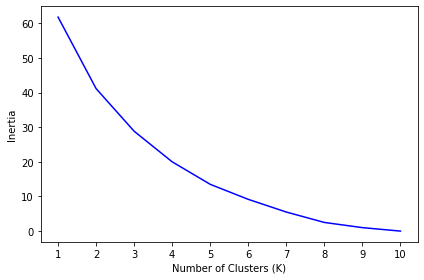

In [89]:
plt.plot(range(1,Ks),inertia,'b')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters (K)')
plt.xticks(range(1,Ks))
plt.tight_layout()
plt.show()

Now use the optimal value for the clustering.

In [90]:
# set number of clusters
kclusters = 3

#nbhd_grouped_lim_clustering = nbhd_grouped_lim.drop('AREA_NAME', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nbhd_grouped_lim_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:25] 

array([0, 1, 1, 0, 2, 0, 2, 2, 1, 0])

In [91]:
# add clustering labels
nbhd_grouped_lim.insert(0, 'Cluster Labels', kmeans.labels_)

nbhd_merged = nbhd_bound[['AREA_NAME','centroid_lat','centroid_lon']]

# merge downtor_grouped with df_down to add latitude/longitude for each postal code
nbhd_merged = nbhd_merged.join(nbhd_grouped_lim.set_index('AREA_NAME'), on='AREA_NAME')

nbhd_merged.head() 

,AREA_NAME,centroid_lat,centroid_lon,Cluster Labels,Grocery Store,Italian Restaurant,Pizza Place,Park,Playground,Skating Rink,Soccer Field,Tennis Court,Track
0,Woodbine Corridor (64),43.676774,-79.315408,0,3,1,1,3,1,0,1,0,0
1,Lawrence Park South (103),43.717213,-79.406038,2,0,2,2,1,1,1,0,0,1
6,Greenwood-Coxwell (65),43.672614,-79.324318,0,2,2,4,2,0,1,1,0,0
8,Danforth East York (59),43.689468,-79.331403,1,0,0,3,2,0,0,0,0,0
10,Blake-Jones (69),43.676173,-79.337394,0,3,1,5,3,0,0,0,0,0


In [92]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


In [176]:
# Create a map of the clusters.

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nbhd_merged['centroid_lat'], nbhd_merged['centroid_lon'], nbhd_merged['AREA_NAME'], nbhd_merged['Cluster Labels']):
#for lat, lon, poi, cluster in zip(nbhd_merged['centroid_lat'], nbhd_merged['centroid_lon'], nbhd_merged['AREA_NAME'], nbhd_merged[nbhd_merged['Cluster Labels'==0]]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

Thus, the mere existence of the particular number of venues of a certain category in a neighborhood can be determined.  This allows us to limit our choice of neighborhoods for the family based on whether or not a certain venue appears in a neghborhood and/or whether a certain type of venue is common in that neighborhood.  We can use that information to find clusters of neighborhoods with desirable characteristics and a metric for ranking them.

In [94]:
for c in [0,1,2]:
    print('\nCluster: ',c)
    df=nbhd_merged.loc[nbhd_merged['Cluster Labels'] == c, nbhd_merged.columns[[0] + list(range(4, nbhd_merged.shape[1]))]]
    display(df)


Cluster:  0


,AREA_NAME,Grocery Store,Italian Restaurant,Pizza Place,Park,Playground,Skating Rink,Soccer Field,Tennis Court,Track
0,Woodbine Corridor (64),3,1,1,3,1,0,1,0,0
6,Greenwood-Coxwell (65),2,2,4,2,0,1,1,0,0
10,Blake-Jones (69),3,1,5,3,0,0,0,0,0
20,East End-Danforth (62),2,0,3,2,0,1,0,0,0



Cluster:  1


,AREA_NAME,Grocery Store,Italian Restaurant,Pizza Place,Park,Playground,Skating Rink,Soccer Field,Tennis Court,Track
8,Danforth East York (59),0,0,3,2,0,0,0,0,0
13,Danforth (66),0,0,3,4,0,0,1,0,1
19,Runnymede-Bloor West Village (89),0,1,4,2,0,0,0,0,0



Cluster:  2


,AREA_NAME,Grocery Store,Italian Restaurant,Pizza Place,Park,Playground,Skating Rink,Soccer Field,Tennis Court,Track
1,Lawrence Park South (103),0,2,2,1,1,1,0,0,1
11,Forest Hill North (102),0,1,2,1,1,1,0,1,0
23,Leaside-Bennington (56),1,0,0,0,0,1,0,0,0


Based on these findings, it appears that the neighborhoods in Cluster 0 have the best mix of the venues and amenities desired by the family.

### Conclusion of Analysis

The best neighborhoods for this family would be:

In [95]:
res=nbhd_merged[nbhd_merged["Cluster Labels"]==0]['AREA_NAME']
print('Recommended Neighborhoods:\n')
print('  ',res.iloc[0])
print('  ',res.iloc[1])
print('  ',res.iloc[2])
print('  ',res.iloc[3])

Recommended Neighborhoods:

   Woodbine Corridor (64)
   Greenwood-Coxwell (65)
   Blake-Jones (69)
   East End-Danforth (62)
